In [8]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
data=pd.read_csv('data/data.csv')

In [9]:
baseColumns = ['INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME', 'R_DEBT_INCOME',
       'R_DEBT_SAVINGS', 'T_CLOTHING_12', 
       'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS', 'R_CLOTHING_DEBT',
       'T_EDUCATION_12', 'R_EDUCATION_INCOME',
       'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT', 'T_ENTERTAINMENT_12',
       'R_ENTERTAINMENT_INCOME',
       'R_ENTERTAINMENT_SAVINGS', 'R_ENTERTAINMENT_DEBT', 'T_FINES_12',
       'R_FINES_INCOME', 'R_FINES_SAVINGS',
       'R_FINES_DEBT', 'T_GAMBLING_12',
       'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS', 'R_GAMBLING_DEBT',
       'T_GROCERIES_12', 'R_GROCERIES_INCOME',
       'R_GROCERIES_SAVINGS', 'R_GROCERIES_DEBT', 'T_HEALTH_12',
       'R_HEALTH_INCOME', 'R_HEALTH_SAVINGS', 'R_HEALTH_DEBT',
       'T_HOUSING_12', 'R_HOUSING_INCOME',
       'R_HOUSING_SAVINGS', 'R_HOUSING_DEBT', 'T_TAX_12',
       'R_TAX_INCOME', 'R_TAX_SAVINGS', 'R_TAX_DEBT', 'T_TRAVEL_12',
       'R_TRAVEL_INCOME', 'R_TRAVEL_SAVINGS',
       'R_TRAVEL_DEBT', 'T_UTILITIES_12', 'T_EXPENDITURE_12',
       'R_UTILITIES_INCOME', 'R_UTILITIES_SAVINGS', 'R_UTILITIES_DEBT',
       'R_EXPENDITURE_INCOME', 'R_EXPENDITURE_SAVINGS', 'R_EXPENDITURE_DEBT',
       'CAT_GAMBLING', 'CAT_DEBT', 'CAT_CREDIT_CARD', 'CAT_MORTGAGE',
       'CAT_SAVINGS_ACCOUNT', 'CAT_DEPENDENTS']

X= data[baseColumns]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['CAT_GAMBLING'] = le.fit_transform(X['CAT_GAMBLING'])

C:\Users\Huawei\AppData\Local\Temp\ipykernel_14520\211689055.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['CAT_GAMBLING'] = le.fit_transform(X['CAT_GAMBLING'])


In [10]:
y = np.array(data['DEFAULT'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score\

# Instantiate the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=16)  

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# with full data without same rates and _6

Accuracy: 0.725


In [12]:
from sklearn.inspection import permutation_importance

result = permutation_importance(knn_classifier, X_test, y_test, n_repeats=10, random_state=42)

importances = result.importances_mean

for i, importance in enumerate(importances):
    print(f"Feature {i}: {importance}")

Feature 0: 0.00791666666666665
Feature 1: 0.007916666666666638
Feature 2: 0.022499999999999954
Feature 3: 0.0
Feature 4: 0.0
Feature 5: 0.0
Feature 6: 0.0004166666666666652
Feature 7: 0.0
Feature 8: 0.0
Feature 9: 0.0
Feature 10: -0.0012499999999999955
Feature 11: 0.0
Feature 12: 0.0
Feature 13: 0.0
Feature 14: 0.002083333333333326
Feature 15: 0.0
Feature 16: 0.0
Feature 17: 0.0
Feature 18: 0.0
Feature 19: 0.0
Feature 20: 0.0
Feature 21: 0.0
Feature 22: 0.0004166666666666652
Feature 23: 0.0
Feature 24: 0.0
Feature 25: 0.0
Feature 26: 0.002083333333333326
Feature 27: 0.0
Feature 28: 0.0
Feature 29: 0.0
Feature 30: -0.002083333333333326
Feature 31: 0.0
Feature 32: 0.0
Feature 33: 0.0
Feature 34: -0.002083333333333326
Feature 35: 0.0
Feature 36: 0.0
Feature 37: 0.0
Feature 38: 0.0
Feature 39: 0.0
Feature 40: 0.0
Feature 41: 0.0
Feature 42: 0.0
Feature 43: 0.0
Feature 44: 0.0
Feature 45: 0.0
Feature 46: -0.002499999999999991
Feature 47: 0.007916666666666638
Feature 48: 0.0
Feature 49: 0.0


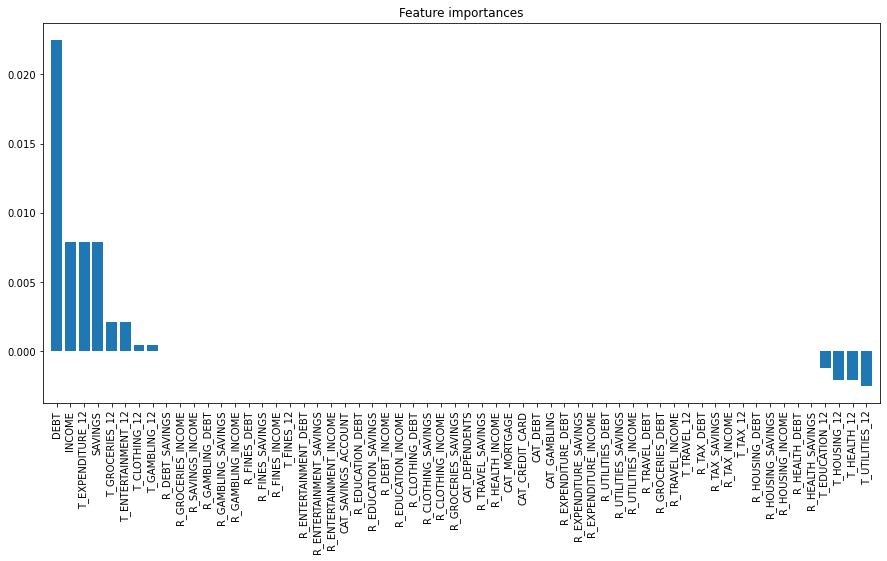

In [13]:

from matplotlib import pyplot as plt


sorted_indices = np.argsort(importances)[::-1]
not_important = X.columns[sorted_indices][abs(importances[sorted_indices])<0.001]
plt.figure(figsize=(15, 7))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [14]:
X_1=X.drop(not_important, axis=1)

X1_train, X1_test, y_train, y_test = train_test_split(
    X_1, y, stratify=y, test_size=0.3, random_state=42
)
knn_classifier = KNeighborsClassifier(n_neighbors=2)  

knn_classifier.fit(X1_train, y_train)

y_pred = knn_classifier.predict(X1_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#dropped not important according to permutation

Accuracy: 0.7375


In [15]:
from sklearn.feature_selection import SelectKBest, chi2


k_best = SelectKBest(score_func=chi2, k=6)  
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)

selected_feature_indices = k_best.get_support(indices=True)
X_train.columns[selected_feature_indices]
#same for 4 3

Index(['SAVINGS', 'DEBT', 'T_ENTERTAINMENT_12', 'T_GROCERIES_12',
       'T_HOUSING_12', 'T_TRAVEL_12'],
      dtype='object')

In [16]:
knn_classifier.fit(X_train_selected, y_train)

accuracy = knn_classifier.score(X_test_selected, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7541666666666667


In [127]:
from sklearn.metrics import classification_report
y_pred = knn_classifier.predict(X_test_selected)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.95      0.85       172
           1       0.68      0.25      0.37        68

    accuracy                           0.75       240
   macro avg       0.72      0.60      0.61       240
weighted avg       0.74      0.75      0.71       240



In [18]:
X_2=data.drop(['DEFAULT','CREDIT_SCORE','CUST_ID'], axis=1)
X_2['CAT_GAMBLING'] = le.fit_transform(X_2['CAT_GAMBLING'])

X2_train, X2_test, y_train, y_test = train_test_split(
    X_2, y, stratify=y, test_size=0.3, random_state=42
)

In [19]:
k2_best = SelectKBest(score_func=chi2, k=10)  
X2_train_selected = k2_best.fit_transform(X2_train, y_train)
X2_test_selected = k2_best.transform(X2_test)

selected2_feature_indices = k2_best.get_support(indices=True)
X2_train.columns[selected2_feature_indices]

Index(['SAVINGS', 'DEBT', 'T_CLOTHING_6', 'T_ENTERTAINMENT_12',
       'T_ENTERTAINMENT_6', 'T_GROCERIES_12', 'T_GROCERIES_6', 'T_TRAVEL_12',
       'T_TRAVEL_6', 'T_EXPENDITURE_6'],
      dtype='object')

In [20]:
knn_classifier.fit(X2_train_selected, y_train)

accuracy = knn_classifier.score(X2_test_selected, y_test)
print("Accuracy:", accuracy)
#same

Accuracy: 0.75


i checked diff parameters and data with/without features _6 and R of same parameters and best score is 0.7541666666666667 outliers didnt help as well

In [99]:
columns=['SAVINGS', 'DEBT', 'T_ENTERTAINMENT_12', 'T_GROCERIES_12', 'T_HOUSING_12', 'T_TRAVEL_12']
data_selected=data[columns]

In [100]:
D_train, D_test, y_train, y_test = train_test_split(
    data_selected, y, stratify=y, test_size=0.3, random_state=42
)

array([[<AxesSubplot:title={'center':'SAVINGS'}>,
        <AxesSubplot:title={'center':'DEBT'}>],
       [<AxesSubplot:title={'center':'T_ENTERTAINMENT_12'}>,
        <AxesSubplot:title={'center':'T_GROCERIES_12'}>],
       [<AxesSubplot:title={'center':'T_HOUSING_12'}>,
        <AxesSubplot:title={'center':'T_TRAVEL_12'}>]], dtype=object)

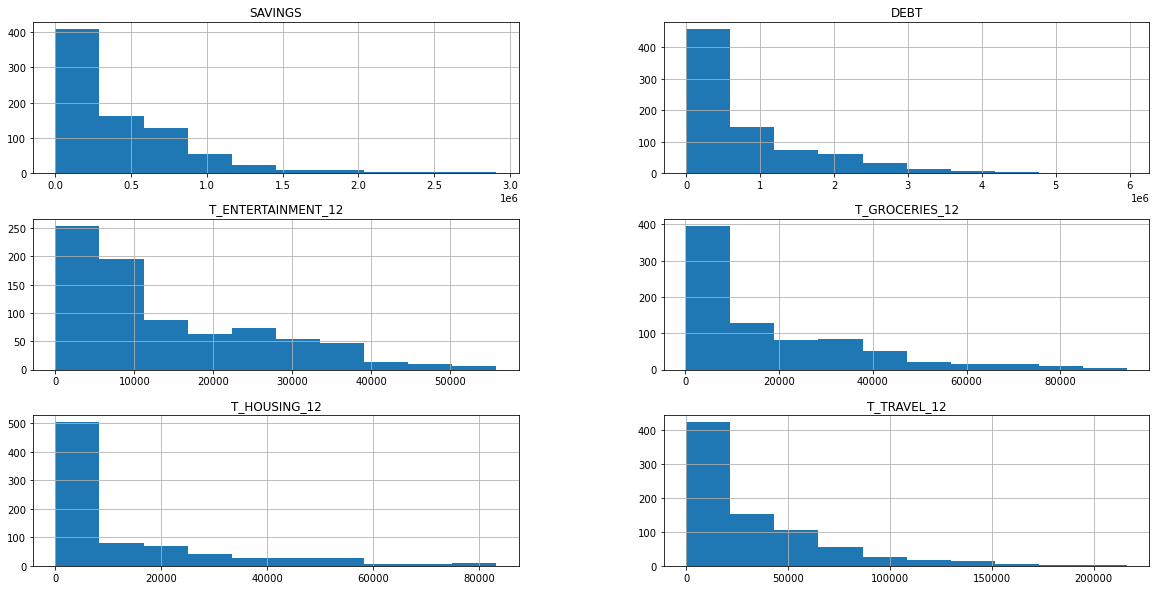

In [103]:
data_selected.hist(figsize=(20,10))

In [105]:
D_train['T_TRAVEL_12'].sort_values(ascending=False)

770    216557
75     194290
477    172948
31     166512
642    157319
        ...  
713         0
744         0
526         0
761         0
350         0
Name: T_TRAVEL_12, Length: 560, dtype: int64

In [108]:
D_train['T_TRAVEL_12'].replace(216557, 172948, inplace=True)
D_train['T_TRAVEL_12'].replace(194290, 172948, inplace=True)

In [111]:
D_train['DEBT'].replace(5968620, 5157365, inplace=True)
D_train['DEBT'].replace(5501471, 5157365, inplace=True)

In [115]:
D_train['SAVINGS'].replace(2738164, 2422014, inplace=True)